# Credit EDA analysis

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pf
import seaborn as sns
import itertools


# 1. Import all the data 

In [3]:
form1 = pd.read_csv("application_data.csv")
form2 = pd.read_csv("previous_application.csv")
meta = pd.read_csv("columns_description.csv", encoding = "ISO-8859-1")

In [ ]:
#Creating Subset of the data with required columns only

#form1 = form1.iloc[]
form1 = form1.iloc[:, np.r_[0:42,118:123]]

In [91]:
form1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [92]:
form1.shape

(307511, 47)

In [93]:
form1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income Grp
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,Business Entity Type 3,0.083037,0.0,0.0,0.0,1.0,low Income
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,School,0.311267,0.0,0.0,0.0,0.0,low Income
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,Government,NaN,0.0,0.0,0.0,0.0,low Income
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,low Income
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,1,1,Religion,NaN,0.0,0.0,0.0,0.0,low Income


In [9]:
form2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 2 . Data Profiling

In [5]:
pf.ProfileReport(form1)

Number of variables,122
Number of observations,307511
Total Missing (%),9.6%
Total size in memory,286.2 MiB
Average record size in memory,976.0 B
Numeric,39
Categorical,16
Boolean,33
Date,0
Text (Unique),0
Rejected,34


In [6]:
pf.ProfileReport(form2)



Number of variables,37
Number of observations,1670214
Total Missing (%),16.3%
Total size in memory,471.5 MiB
Average record size in memory,296.0 B
Numeric,17
Categorical,16
Boolean,1
Date,0
Text (Unique),0
Rejected,3


# 3 .Data Quality Check and Missing values

1. Find the percentage of missing values for all the columns.
2. Remove columns with high missing percentage.
3. For columns which has less percentage(around 13% or so), you need to check what will be the best metric to impute the missing values? Like if the column you are checking is a categorical column check, which category you can use to fill the nulls. For others check does mean or median can be imputed or not. Others cases may be imputing with 0. You need to do this task for some variables and not for all, say 5.
4. Check the datatypes of all the columns and change the datatype if required. 
5. For numerical columns check for outliers and report them for at-least 3 variables. Treat them and analyse it.
    col 1. Amt_Income_total  col 2. AMT_REQ_CREDIT_BUREAU_DAY col 3. AMT_REQ_CREDIT_BUREAU_QRT
6. Binning of continuous variables. Check if you need to bin any variable in different categories. Do this for one or two columns.
   CODE_GENDER --Bin as per AGE BUCKET for each gender.

In [8]:
#calcultaing percentage 
round(form1.isnull().sum()/len(form1.index), 2)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OWN_CAR_AGE                   66.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE     

In [10]:
# removing the columns having highest missing values ( more than 13%)
missing_columns = form1.columns[100*(form1.isnull().sum()/len(form1.index)) >14]
print(missing_columns)

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

In [12]:
form1_df = form1.drop(missing_columns, axis=1)
print(form1_df.shape)

(307511, 71)


In [181]:
100*(form1_df.isnull().sum()/len(form1_df.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [13]:
#Checking the Missing value for imputation randomly
form1_df.loc[:, ['AMT_ANNUITY','NAME_TYPE_SUITE','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR']].head()        
                 

,AMT_ANNUITY,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR
0,24700.5,Unaccompanied,1.0,2.0,0.0
1,35698.5,Family,2.0,0.0,0.0
2,6750.0,Unaccompanied,1.0,0.0,0.0
3,29686.5,Unaccompanied,2.0,0.0,NaN
4,21865.5,Unaccompanied,1.0,0.0,0.0


# Imputation for missing valuse
1. Amt_Annuity: itcan be imputed with mean value unless there is major outlier
2. Name_Type_Suite: it can be imputed with some defalut value as per buisness understanding
3. CNT_FAM_Memebers: It can be imputed with Avg number of count.
    
    

# 4. Analysis
1. Check the Imbalance percentage. No balancing technique required.
2. Divide the data into two sets, i.e. Target=1 and Target=0.
3. Perform univariate analysis for categorical variables for both 0 and 1.
4. Find correlation for numerical columns for both the cases, i.e. 0 and 1.
5. Check the variables with highest correlation are the same in both the files or not?
6. Perform univariate for numerical variables for both 0 and 1.
7. Perform bivariate analysis for numerical variables for both 0 and 1.

In [104]:
#Check the datatypes of all the columns and change the datatype if required
form1_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [14]:
# Here we can convert AMT_INCOME_TOTAL & AMT_CREDIT in to Low, medium and high by binning the loan amount

# lets also convert interest rate to low, medium, high
# binning loan amount
def incm_grp(n):
    if n <= 500000:
        return 'low Income'
    elif n > 500000 and n <= 1500000:
        return 'Medium Income'
    else:
        return 'High Income'
    
    
form1_df['Income Grp'] = form1_df['AMT_INCOME_TOTAL'].apply(lambda x: incm_grp(x))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


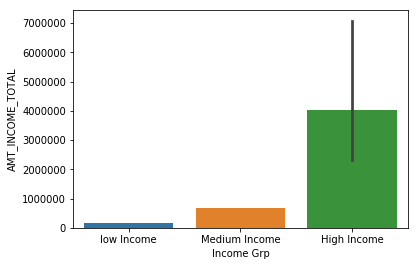

In [15]:
sns.barplot(x='Income Grp', y='AMT_INCOME_TOTAL', data=form1_df)


# Binning The Data to convert numeric in to categorical variable
The Above example where we have binned the income total in to category to see whih income group has most number of 
applicaiton 

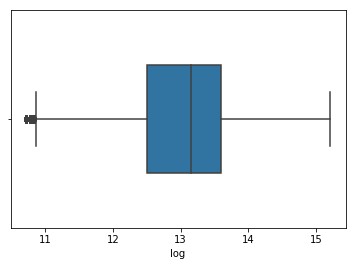

In [19]:
#Outliers for Numeric variable Amt_income, Credit and age 

#form1_df.loc[form1_df.AMT_CREDIT].plot(kind='box')
values = np.log(form1_df['AMT_CREDIT'])
form1_df_temp = form1_df
form1_df_temp['log'] = values
sns.boxplot(x=form1_df['log'],width=0.5)



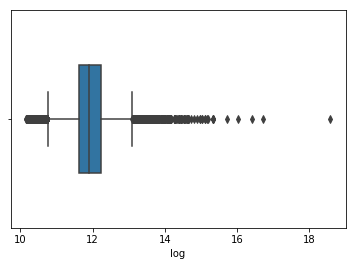

In [20]:
values = np.log(form1_df['AMT_INCOME_TOTAL'])
form1_df_temp = form1_df
form1_df_temp['log'] = values
sns.boxplot(x=form1_df['log'],width=0.5)

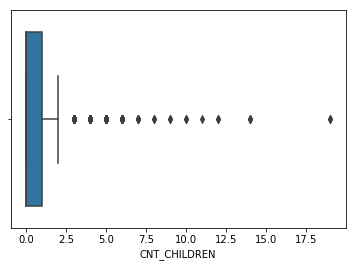

In [32]:
sns.boxplot(x=form1_df['CNT_CHILDREN'])

# Outliers
Above Box plot illustrates the outlier in selected columns 

# Target variable to check data imbalance or Balnace.


In [13]:
print(form1_df.TARGET.value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64


In [1]:
print(282686/24825) #Imbalance ratio

11.387150050352467


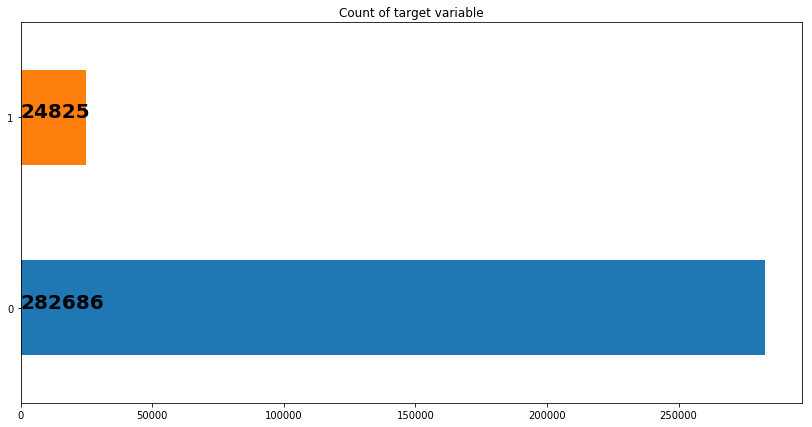

In [112]:
plt.figure(figsize=(14,7))

ax = form1_df["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(form1_df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

In [117]:
df_1 = form1_df[form1_df['TARGET']== 1]
df_0 = form1_df[form1_df['TARGET']== 0]

In [119]:
df_1.shape

(24825, 44)

In [121]:
df_0.shape

(282686, 44)

# Univariate Analysis for Below categorical variables.
 1. CODE_GENDER
 2. FLAG_OWN_REALTY
 3. NAME_CONTRACT_TYPE
 4. NAME_EDUCATION_TYPE
 5. NAME_INCOME_TYPE
 6. NAME_TYPE_SUITE
 7. ORGANIZATION_TYPE

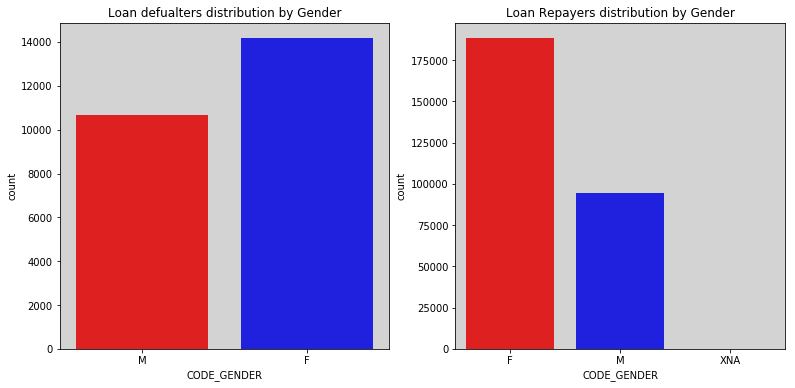

In [122]:

fig  = plt.figure(figsize=(13,6))

plt.subplot(121)
#my_tab = pd.crosstab(index = df_1["CODE_GENDER"], columns="count")      

ax = sns.countplot("CODE_GENDER",data=df_1,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Loan defualters distribution by Gender")


plt.subplot(122)

ax = sns.countplot("CODE_GENDER",data=df_0,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Loan Repayers distribution by Gender")
#my_tab = pd.crosstab(index = df_0["CODE_GENDER"], columns="count")    

plt.show()


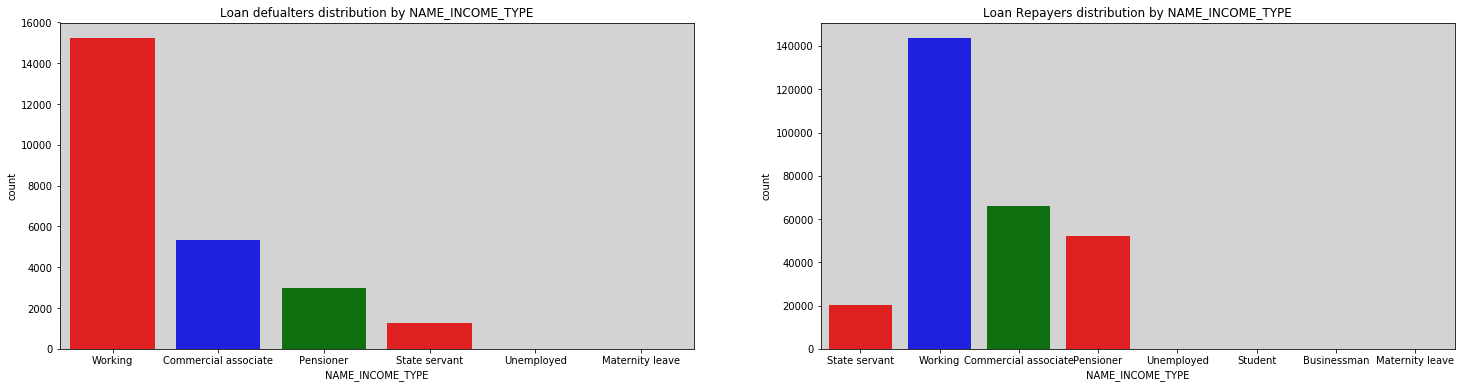

In [125]:
fig  = plt.figure(figsize=(25,6))
plt.subplot(121)
   

ax = sns.countplot("NAME_INCOME_TYPE",data=df_1,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Loan defualters distribution by NAME_INCOME_TYPE")


plt.subplot(122)

ax = sns.countplot("NAME_INCOME_TYPE",data=df_0,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Loan Repayers distribution by NAME_INCOME_TYPE")
  

plt.show()

In [195]:
#Selecting colmumns having Nmeric data types.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf_1 = df_1.select_dtypes(include=numerics)
newdf_0 = df_0.select_dtypes(include=numerics)

#Selecting continous Numeric Varaibles to see correlation between default and non-defualt 

corr_vars_1 =  newdf_1[['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                        'DAYS_BIRTH','CNT_FAM_MEMBERS']]

corr_vars_0 =  newdf_0[['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                        'DAYS_BIRTH','CNT_FAM_MEMBERS']]

In [193]:
#corr_vars_1 =  form1_df[['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                        'DAYS_BIRTH','CNT_FAM_MEMBERS']]

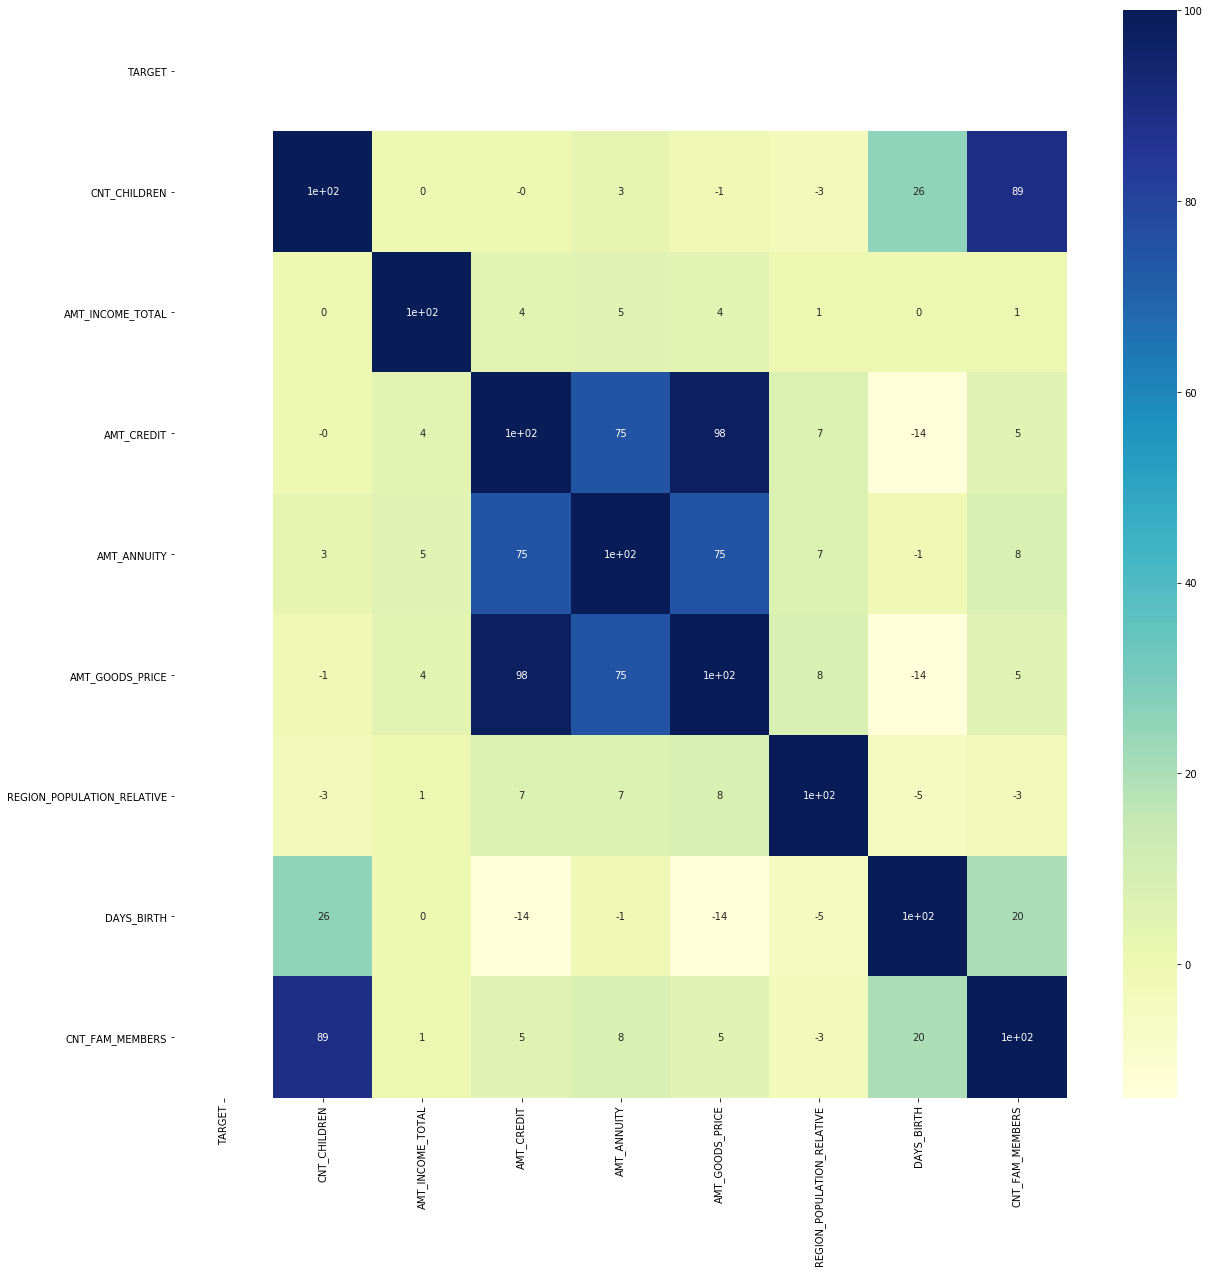

In [196]:
#Find correlation for numerical columns for both the cases, i.e. 0 and 1.

plt.figure(figsize=(20,20))
sns.heatmap(round(corr_vars_1.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()

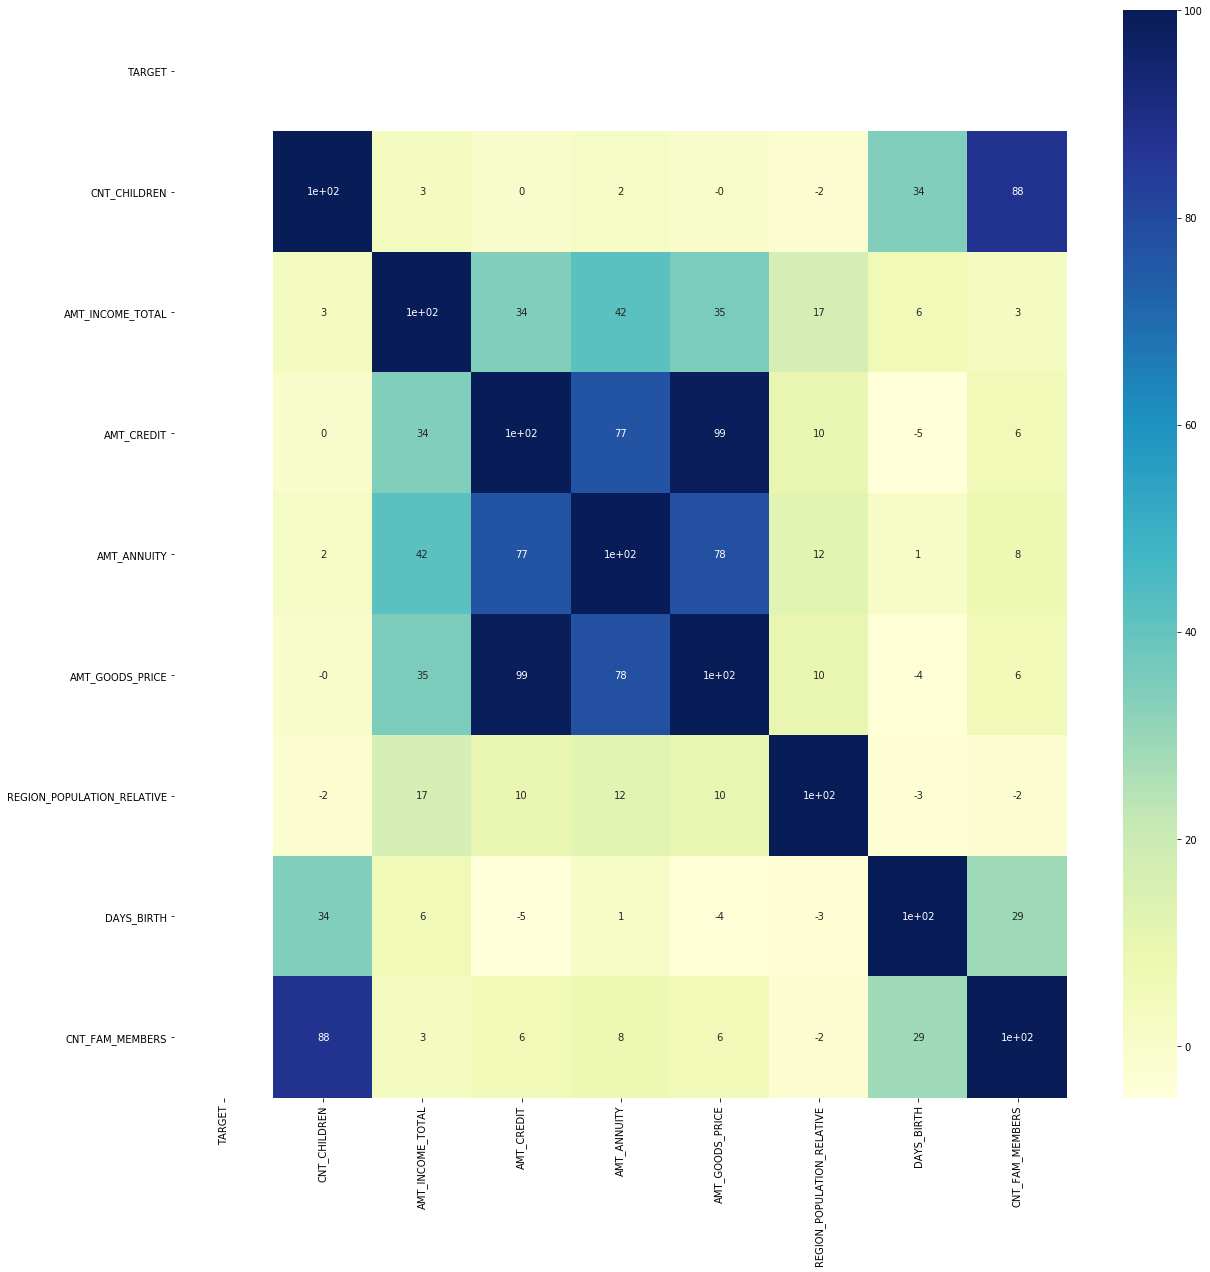

In [197]:
plt.figure(figsize=(20,20))
sns.heatmap(round(corr_vars_0.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()

# Univariate Analysis for Below numerical variables for Target 0 and 1
1. AMT_ANNUITY
2. AMT_CREDIT
3. AMT_INCOME_TOTAL
4. CNT_CHILDREN

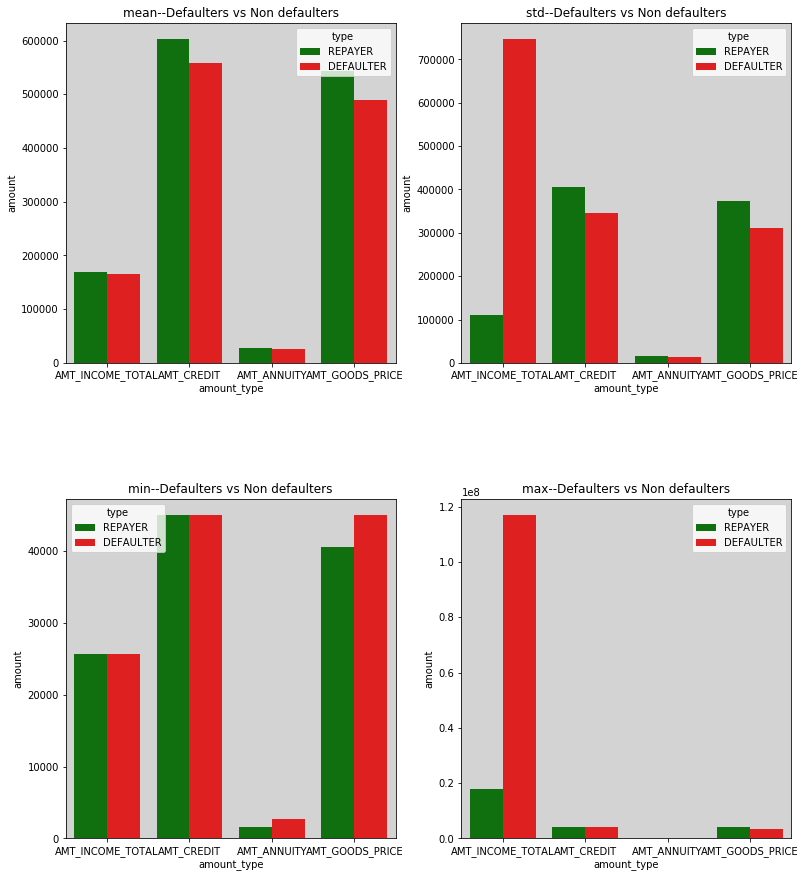

In [185]:


cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df = form1_df.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)


stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

# Bivariate analysis for numerical variables for both 0 and 1

Comparing summary statistics between defaulters and non - defaulters for loan amounts .
Income of client -
1. average income of clients who default and who do not are almost same.
2. standard deviation in income of client who default is very high compared to who do not default. 
3.  clients who default also has maximum income earnings

Credit amount of the loan ,Loan annuity,Amount goods price -
1. .statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.



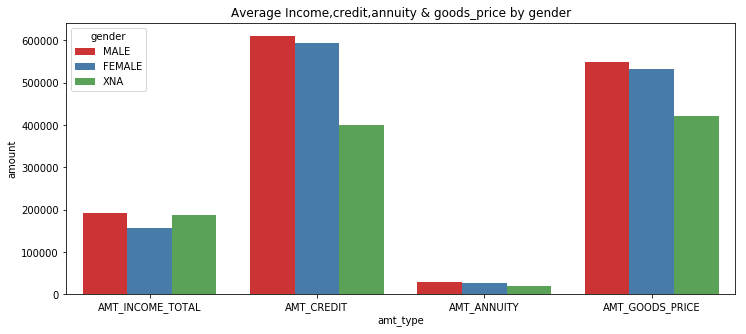

In [186]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = form1_df.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()
df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

# Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)
>Percentage of males is 10%  more in defaults than non defaulters.

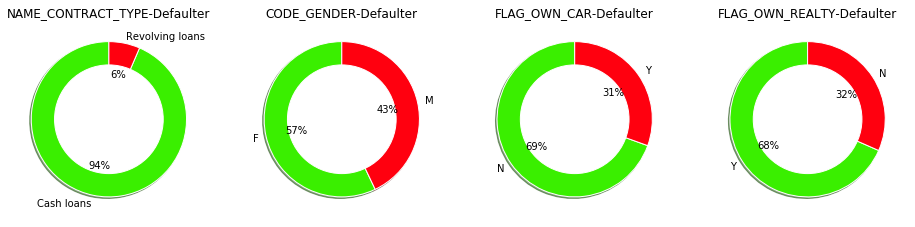

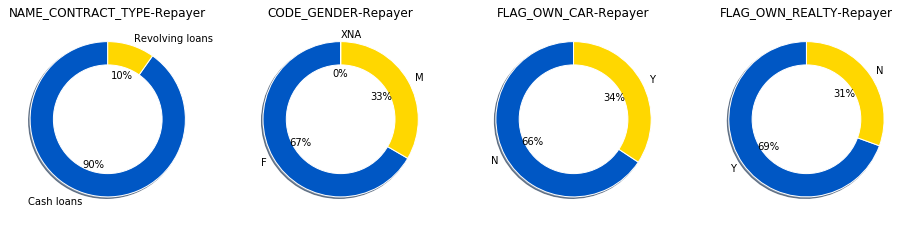

In [189]:
default = form1_df[form1_df["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = form1_df[form1_df["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")


# 5. Read “Previous Application” data.

 1. Perform univariate and bivariate analysis to find some pattern. 


In [ ]:
form2.dtypes

In [ ]:
form2.shape

In [ ]:
form2.isna().sum()

In [ ]:
round(form2.isnull().sum()/len(form2.index), 2)*100

In [ ]:
# removing the columns having highest missing values ( more than 13%)
missing_columns = form2.columns[100*(form2.isnull().sum()/len(form2.index)) >15]
print(missing_columns)

In [ ]:
form2_df = form2.drop(missing_columns, axis=1)
fig  = plt.figure(figsize=(13,6))
print(form2_df.shape)

In [20]:
100*(form2_df.isnull().sum()/len(form2_df.index))

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716
dtype: float64

Text(0.5, 1.0, 'Type of Contract Product')

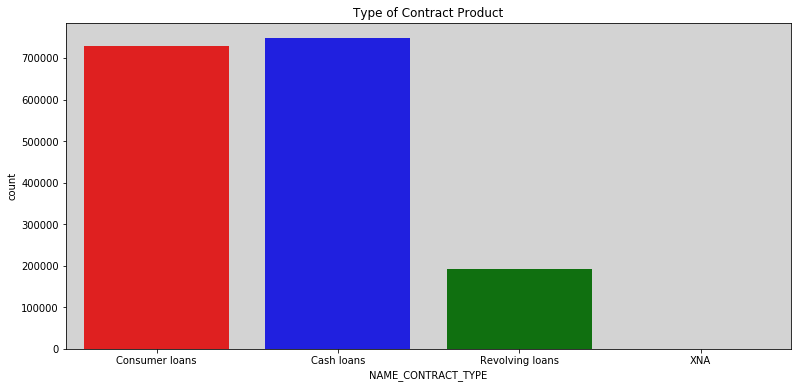

In [21]:
fig  = plt.figure(figsize=(13,6))
ax = sns.countplot("NAME_CONTRACT_TYPE",data=form2_df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Type of Contract Product")


Text(0.5, 1.0, 'Type of Payment Applied for')

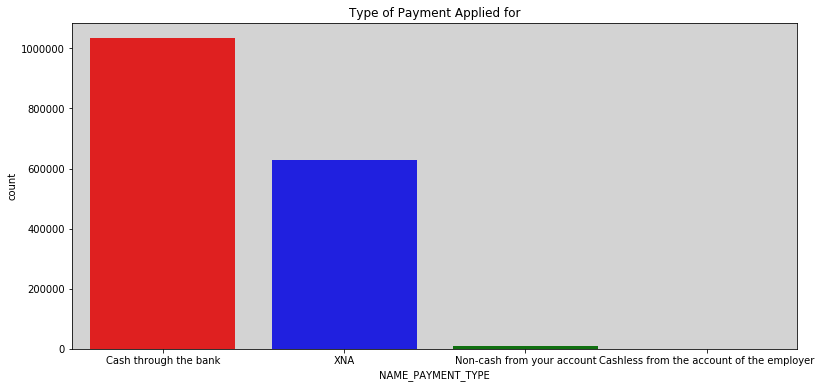

In [22]:
fig  = plt.figure(figsize=(13,6))
ax = sns.countplot("NAME_PAYMENT_TYPE",data=form2_df,palette=["r","b","g","y"])
ax.set_facecolor("lightgrey")
ax.set_title("Type of Payment Applied for")

Text(0.5, 1.0, 'Client Type')

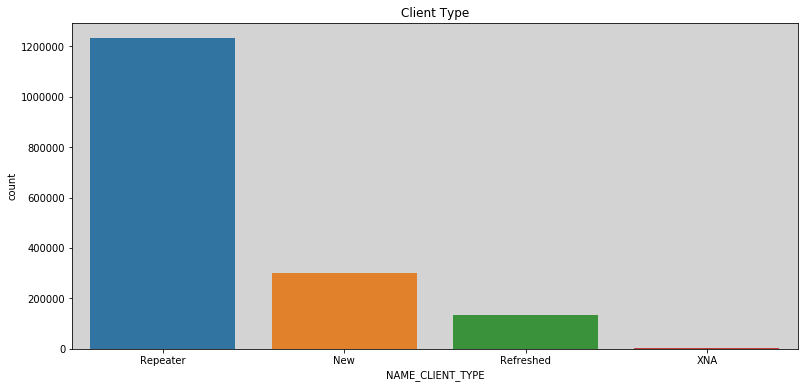

In [23]:
fig  = plt.figure(figsize=(13,6))
ax = sns.countplot("NAME_CLIENT_TYPE",data=form2_df)
ax.set_facecolor("lightgrey")
ax.set_title("Client Type")

Text(0.5, 1.0, 'Type of Product')

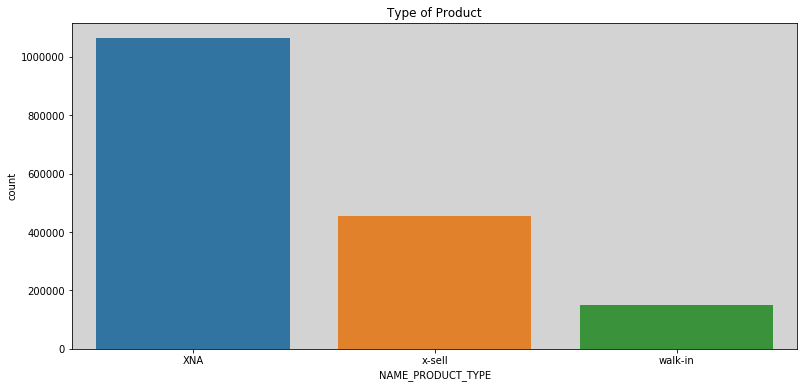

In [24]:
fig  = plt.figure(figsize=(13,6))
ax = sns.countplot("NAME_PRODUCT_TYPE",data=form2_df)
ax.set_facecolor("lightgrey")
ax.set_title("Type of Product")

Text(0.5, 1.0, 'Process Start Hours and Days to Decision')

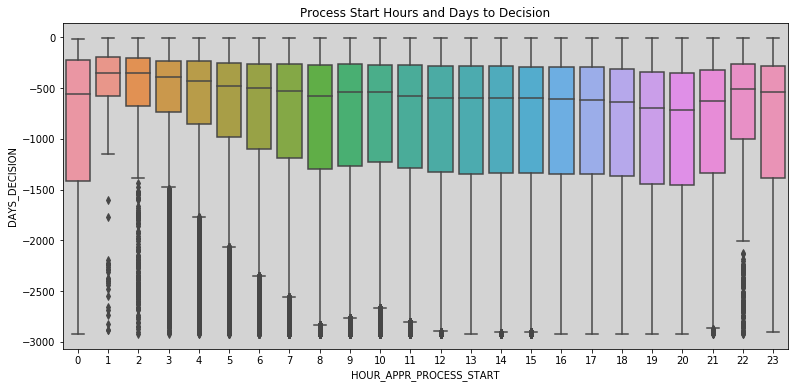

In [4]:
fig  = plt.figure(figsize=(13,6))
ax = sns.boxplot(x='HOUR_APPR_PROCESS_START', y='DAYS_DECISION', data=form2)
ax.set_facecolor("lightgrey")
ax.set_title("Process Start Hours and Days to Decision")